<a href="https://colab.research.google.com/github/Aitslab/SOPs/blob/main/CDLAI_SOP_ExploratoryDataAnalysis_Tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CDLAI Standard Operating Procedure**
# Exploratoy Data Analysis (Tabular Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Generate a random dataset for testing and load into dataframe
np.random.seed(42)  # For reproducibility
num_rows = 500 # Set the number of rows

# Generate normally distributed data for 'A'
A = np.random.normal(0, 1, num_rows)

# Generate 'B' as a linear combination of 'A' with added noise for correlation of 0.8
noise = np.random.normal(0, 1, num_rows)  # Gaussian noise
B = 0.8 * A + 0.6 * noise  # The 0.8 factor makes 'B' correlated with 'A'

# Generate other columns
C = np.random.uniform(-3, 3, num_rows)  # Uniformly distributed data
D = np.random.choice(['Category 1', 'Category 2', 'Category 3', None], size=num_rows)  # Categorical data
E = np.random.choice(['Text A', 'Text B', 'Text C', ''], size=num_rows)  # Another categorical
F = E
G = E
H = D

# Create the DataFrame
data = {
    'A': A,
    'B': B,
    'C': C,
    'D': D,
    'E': E,
    'F': F,
    'G': G,
    'H': H
}

df = pd.DataFrame(data)

In [3]:
# Define your dataset path and load into dataframe
data = 'PATH_TO_DATA'
df = pd.read_csv(data)

FileNotFoundError: [Errno 2] No such file or directory: 'PATH_TO_DATA'

# Dataset overview

In [4]:
# Show first 10 rows
df.head(10)

,A,B,C,D,E,F,G,H
0,0.496714,0.953078,-1.995105,Category 3,Text A,Text A,Text A,Category 3
1,-0.138264,1.035039,-2.372593,Category 1,Text C,Text C,Text C,Category 1
2,0.647689,-0.320990,0.818581,Category 1,Text B,Text B,Text B,Category 1
3,1.523030,1.556205,1.238854,Category 3,Text A,Text A,Text A,Category 3
4,-0.234153,-0.577708,-2.810483,None,Text A,Text A,Text A,None
5,-0.234137,-0.479585,2.617273,Category 3,Text B,Text B,Text B,Category 3
6,1.579213,0.907934,-2.688172,None,Text B,Text B,Text B,None
7,0.767435,0.095553,0.247778,Category 1,Text B,Text B,Text B,Category 1
8,-0.469474,-0.346467,1.254363,Category 1,Text B,Text B,Text B,Category 1
9,0.542560,-0.064522,2.225815,None,Text B,Text B,Text B,None


In [5]:
# Show last 10 rows
df.tail(10)

,A,B,C,D,E,F,G,H
490,-0.007973,0.118652,0.820018,Category 3,Text A,Text A,Text A,Category 3
491,1.479944,-0.041086,0.683602,Category 1,,,,Category 1
492,0.077368,-0.086412,-2.600088,Category 1,,,,Category 1
493,-0.861284,-1.098218,0.110448,None,Text A,Text A,Text A,None
494,1.523124,0.617527,-2.098986,Category 1,Text A,Text A,Text A,Category 1
495,0.538910,0.262468,1.424603,Category 1,Text A,Text A,Text A,Category 1
496,-1.037246,0.248815,0.073332,Category 2,Text B,Text B,Text B,Category 2
497,-0.190339,0.232235,1.081367,None,Text A,Text A,Text A,None
498,-0.875618,-1.043202,-2.749963,Category 2,Text B,Text B,Text B,Category 2
499,-1.382800,-0.762690,-2.491248,Category 3,Text A,Text A,Text A,Category 3


In [6]:
# Check dataset shape, column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       500 non-null    float64
 1   B       500 non-null    float64
 2   C       500 non-null    float64
 3   D       365 non-null    object 
 4   E       500 non-null    object 
 5   F       500 non-null    object 
 6   G       500 non-null    object 
 7   H       365 non-null    object 
dtypes: float64(3), object(5)
memory usage: 31.4+ KB


# Missing values and duplicates

In [7]:
# Count NaN or None values in columns
nan_values = df.isnull().sum()
print('NaN values in columns:')
print(nan_values)

# Count empty string values in columns
empty_values = (df == '').sum()
print('Empty string values in columns:')
print(empty_values)

# Count combined missing values in colums
missing_values = nan_values + empty_values
print('Total missing values in columns:')
print(missing_values)

# Count rows with NaN
rows_with_nan = df[df.isnull().any(axis=1)]
print("\nRows with at least one NaN value:")
print(len(rows_with_nan))

# Count rows with empty strings
rows_with_empty = df[(df == '').any(axis=1)]
print("\nRows with at least one empty string value:")
print(len(rows_with_empty))

# Count rows with combined missing values
rows_with_missing = rows_with_nan + rows_with_empty
print("\nRows with at least one missing value:")
print(len(rows_with_missing))

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate rows:")
print(len(duplicate_rows))

# Check for duplicate columns
n_cols = len(df.columns)
identical_pairs = []

for i in range(n_cols):
    for j in range(i + 1, n_cols):
        if df.iloc[:, i].equals(df.iloc[:, j]):
            identical_pairs.append((df.columns[i], df.columns[j]))

if identical_pairs:
    print("\nDuplicate columns:")
    for pair in identical_pairs:

        print(", ".join(pair))
else:
    print("No identical columns found.")

NaN values in columns:
A      0
B      0
C      0
D    135
E      0
F      0
G      0
H    135
dtype: int64
Empty string values in columns:
A      0
B      0
C      0
D      0
E    139
F    139
G    139
H      0
dtype: int64
Total missing values in columns:
A      0
B      0
C      0
D    135
E    139
F    139
G    139
H    135
dtype: int64

Rows with at least one NaN value:
135

Rows with at least one empty string value:
139

Rows with at least one missing value:
237

Duplicate rows:
0

Duplicate columns:
D, H
E, F
E, G
F, G


# Analysis of numerical columns

In [8]:
# Calculate statistics for numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int'])
numerical_cols.describe()

,A,B,C
count,500.000000,500.000000,500.000000
mean,0.006838,0.024566,0.013079
std,0.981253,0.943847,1.737652
min,-3.241267,-2.665804,-2.970360
25%,-0.700307,-0.586144,-1.567373
50%,0.012797,0.033686,0.064932
75%,0.636783,0.604533,1.419120
max,3.852731,4.100059,2.996482


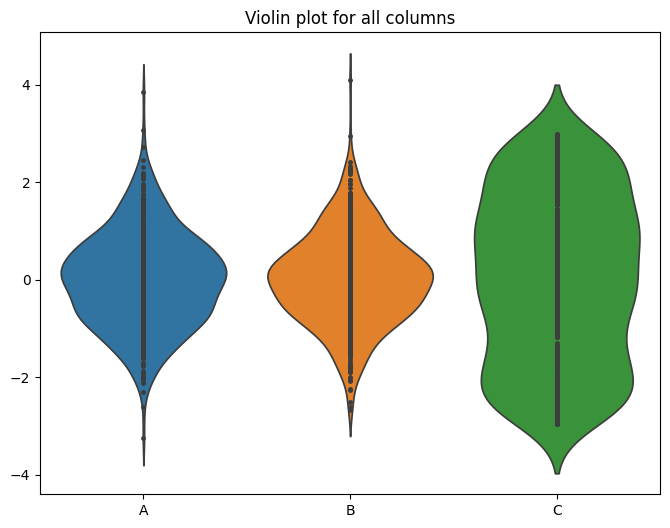

In [9]:
# Plot the distribution of the numerical column in a violin plot (outliers marked)
plt.figure(figsize=(8, 6))
sns.violinplot(data=numerical_cols, inner="points")  # 'inner="point"' shows the outliers as dots

plt.title('Violin plot for all columns')
plt.show()

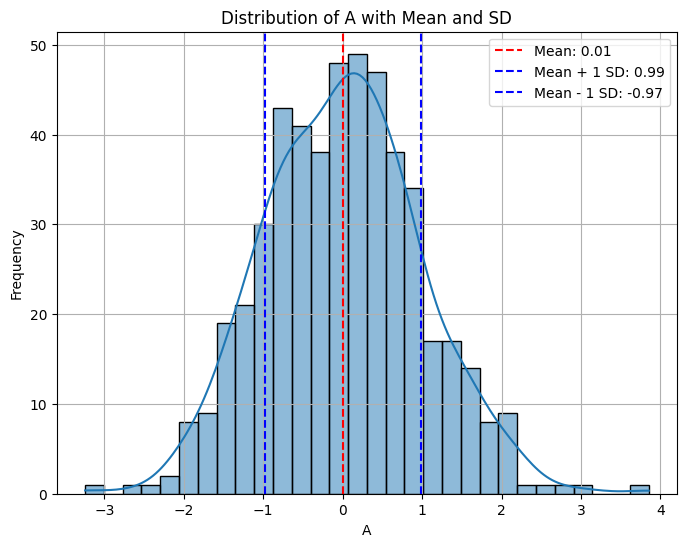

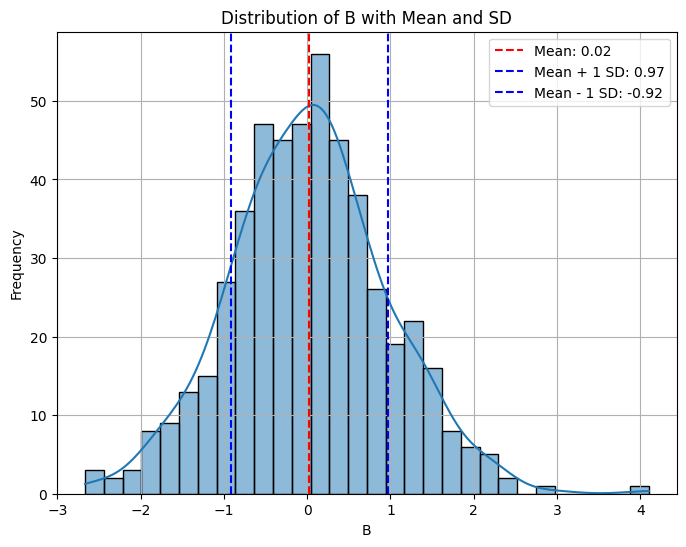

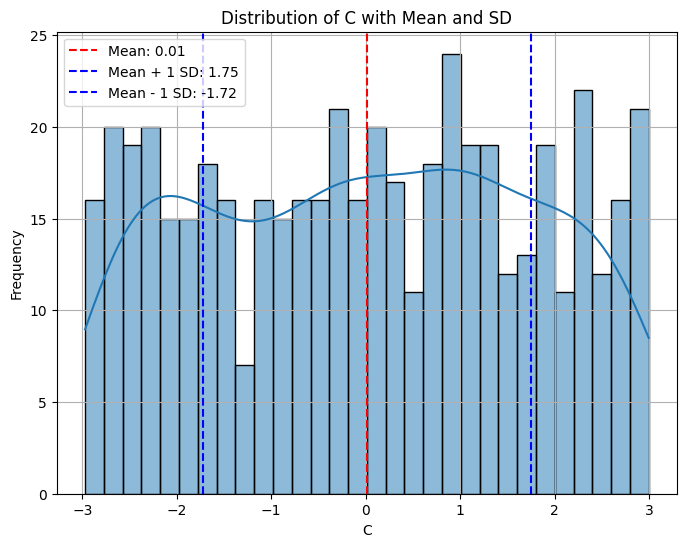

In [10]:
# Plot the distribution of each numerical column as a histogram with mean and SD lines
for column in numerical_cols.columns:
    # Calculate mean and standard deviation
    mean = numerical_cols[column].mean()
    std_dev = numerical_cols[column].std()

    # Create the histogram plot with KDE (Kernel Density Estimate)
    plt.figure(figsize=(8, 6))
    sns.histplot(numerical_cols[column], kde=True, bins=30)

    # Add lines for mean and mean ± 1 SD
    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(mean + std_dev, color='blue', linestyle='--', label=f'Mean + 1 SD: {mean + std_dev:.2f}')
    plt.axvline(mean - std_dev, color='blue', linestyle='--', label=f'Mean - 1 SD: {mean - std_dev:.2f}')

    # Add labels and grid
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True)

    # Add title and legend
    plt.title(f'Distribution of {column} with Mean and SD')
    plt.legend()

    # Show the plot
    plt.show()


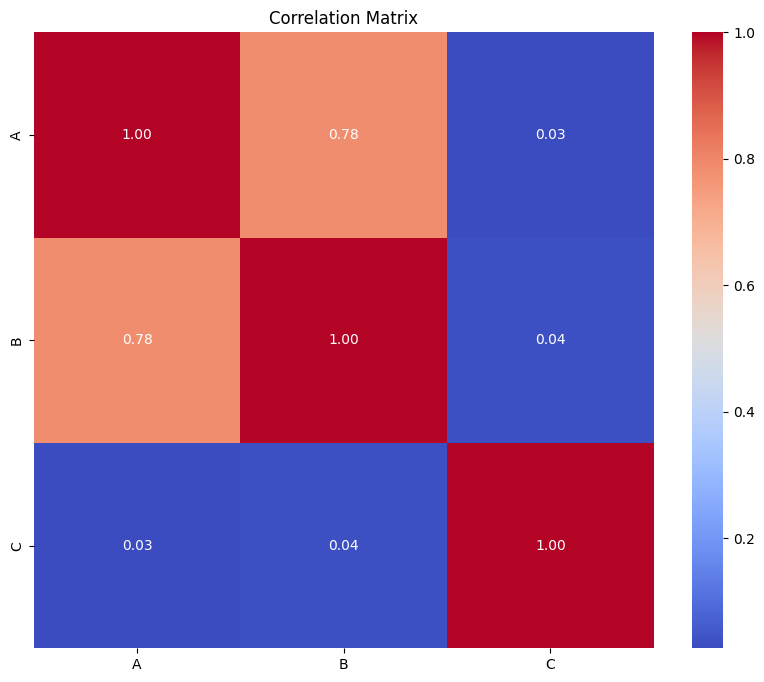

In [11]:
# Calculate the correlation matrix and scatter plot for correlated pairs
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

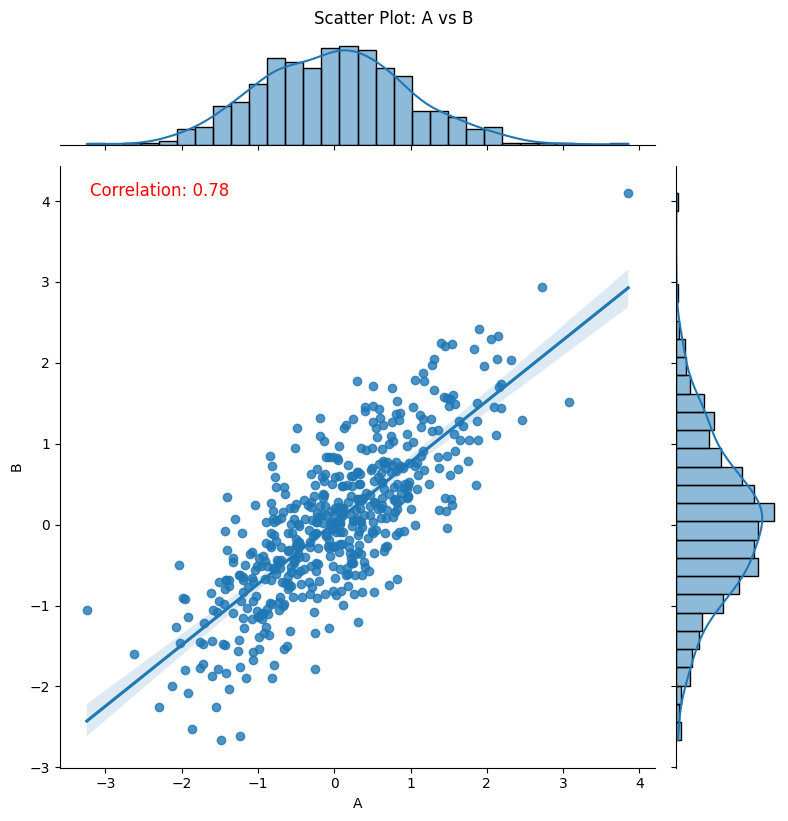

In [12]:
# Create scatterplots for most highly correlated columns (defined by threshold)
threshold = 0.7
correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlated_pairs.append((col1, col2))

# Plot scatter plots for correlated pairs showing the regression line with 95% confidence interval
for col1, col2 in correlated_pairs:
    g = sns.jointplot(
        data=df, x=col1, y=col2, kind="reg", height=8, marginal_kws=dict(bins=30, fill=True)
    )
    correlation_value = correlation_matrix.loc[col1, col2]
    g.ax_joint.text(
        0.05, 0.95, f"Correlation: {correlation_value:.2f}",
        transform=g.ax_joint.transAxes, fontsize=12, color="red"
    )
    g.fig.suptitle(f"Scatter Plot: {col1} vs {col2}", y=1.02)
    plt.show()


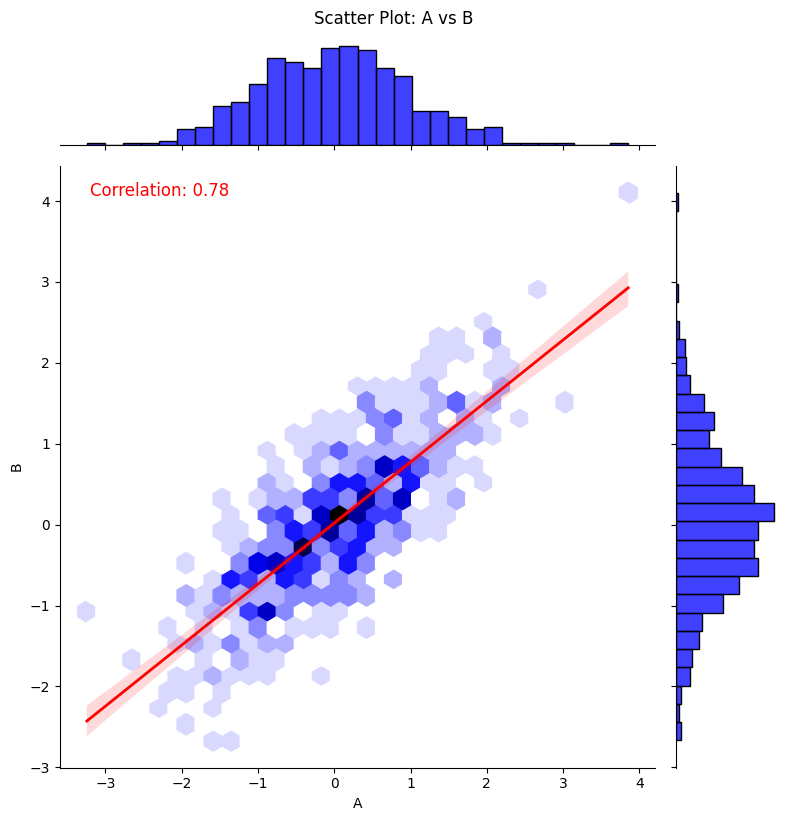

In [13]:
# Create densityplots for most highly correlated columns (defined by threshold)
threshold = 0.7
correlated_pairs = []

# Find the highly correlated column pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            correlated_pairs.append((col1, col2))

# Plot scatter plots with heatmap-style coloring for correlated pairs
for col1, col2 in correlated_pairs:
    # Create the heatmap-style (hex) jointplot
    g = sns.jointplot(
        data=df, x=col1, y=col2, kind="hex", height=8,
        color="blue", gridsize=30, marginal_kws=dict(bins=30, fill=True)
    )

    # Calculate the correlation for the current pair
    correlation_value = correlation_matrix.loc[col1, col2]

    # Display the correlation value on the plot
    g.ax_joint.text(
        0.05, 0.95, f"Correlation: {correlation_value:.2f}",
        transform=g.ax_joint.transAxes, fontsize=12, color="red"
    )

    # Add a regression line with 95% confidence interval
    sns.regplot(
        data=df, x=col1, y=col2, scatter=False, ax=g.ax_joint,
        line_kws={"color": "red", "lw": 2}, ci=95
    )

    # Set the title for the plot
    g.fig.suptitle(f"Scatter Plot: {col1} vs {col2}", y=1.02)

    # Display the plot
    plt.show()


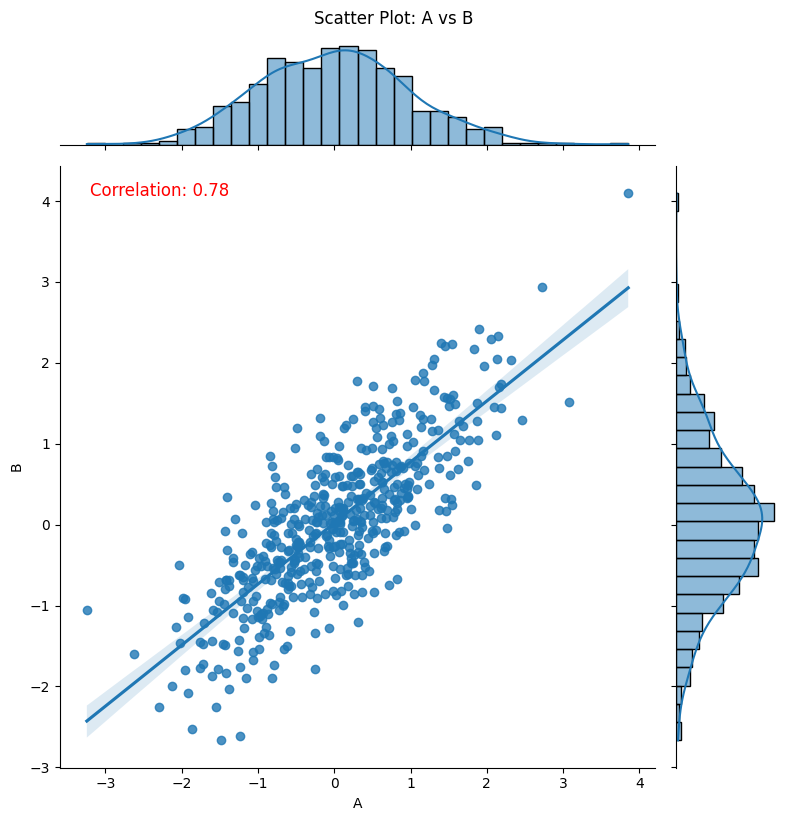

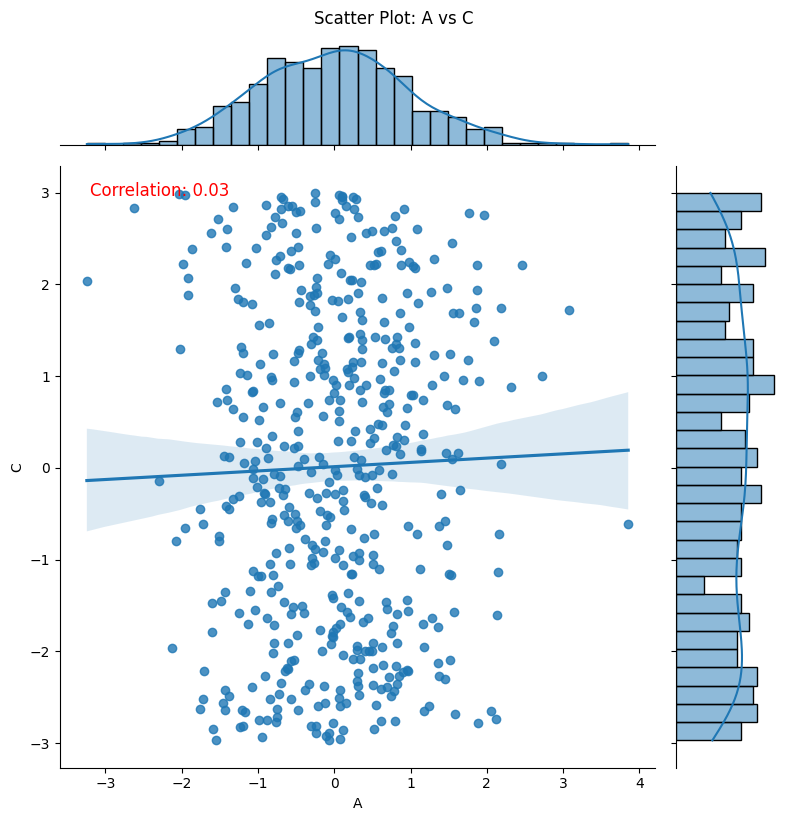

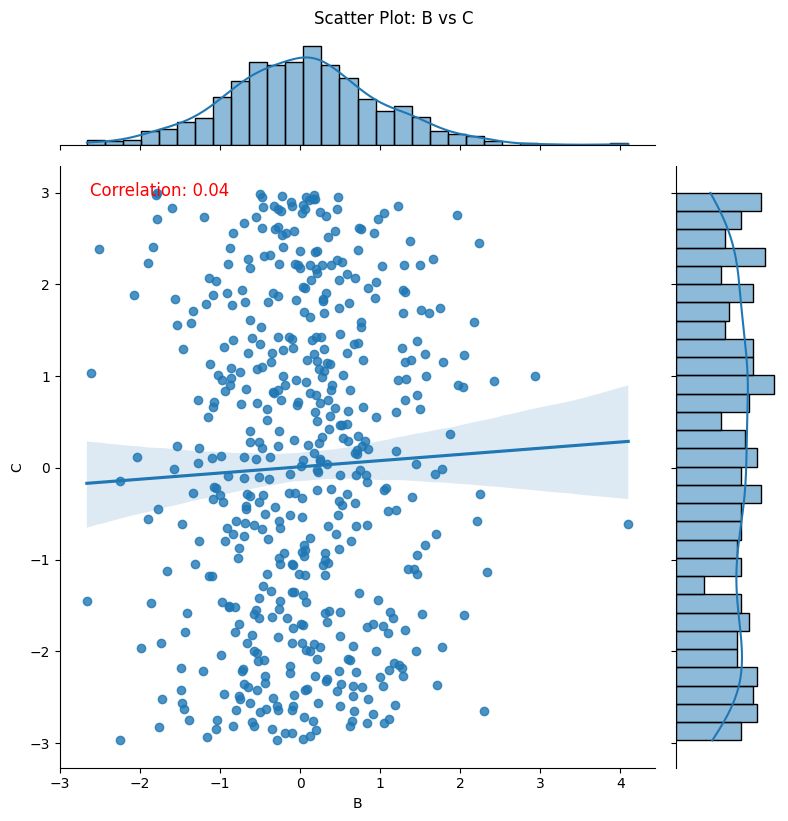

In [14]:
# Create scatterplots for all pairs of numerical columns

# Create all pairs of numerical columns
column_pairs = [(col1, col2) for i, col1 in enumerate(numerical_cols.columns) for j, col2 in enumerate(numerical_cols.columns) if i < j]

# Plot scatter plots for each pair of numerical columns
for col1, col2 in column_pairs:
    g = sns.jointplot(
        data=df, x=col1, y=col2, kind="reg", height=8, marginal_kws=dict(bins=30, fill=True)
    )

    # Calculate the correlation for the current pair
    correlation_value = numerical_cols[col1].corr(numerical_cols[col2])

    # Display the correlation value on the plot
    g.ax_joint.text(
        0.05, 0.95, f"Correlation: {correlation_value:.2f}",
        transform=g.ax_joint.transAxes, fontsize=12, color="red"
    )

    # Set the title for the plot
    g.fig.suptitle(f"Scatter Plot: {col1} vs {col2}", y=1.02)

    # Display the plot
    plt.show()

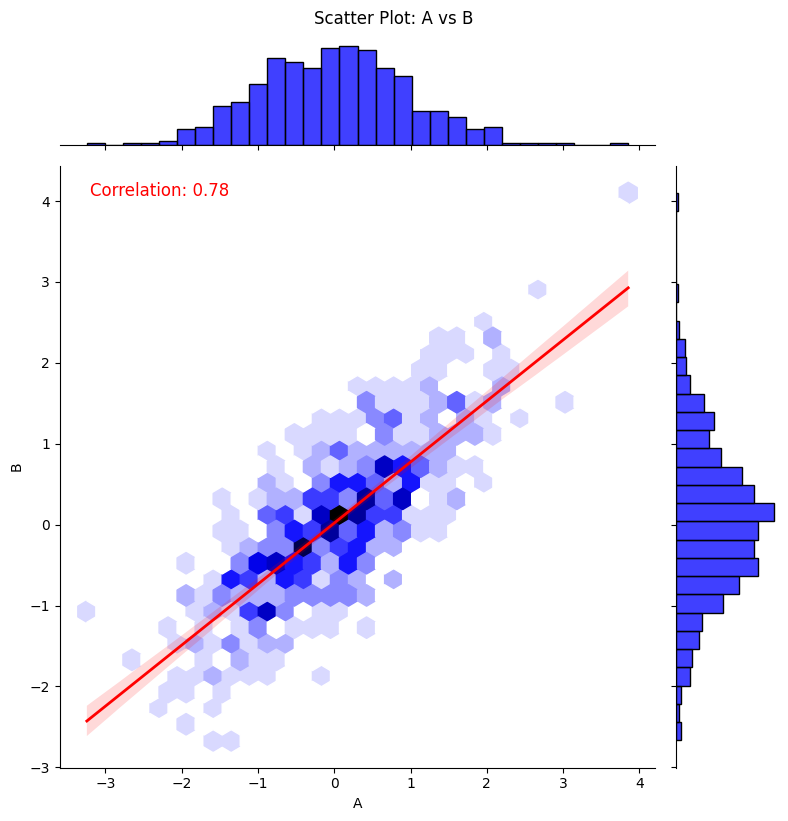

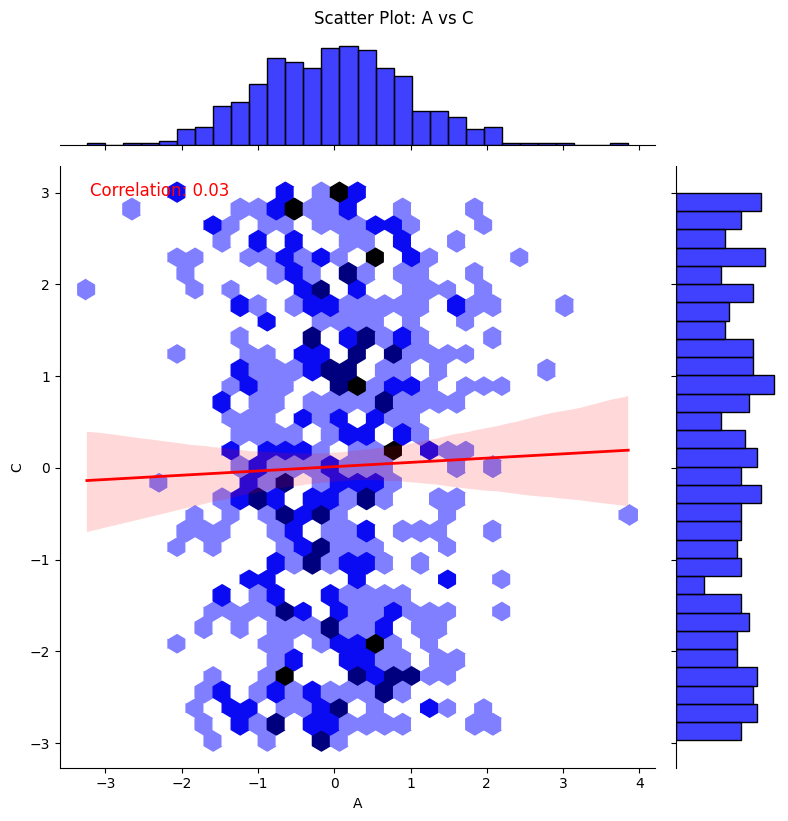

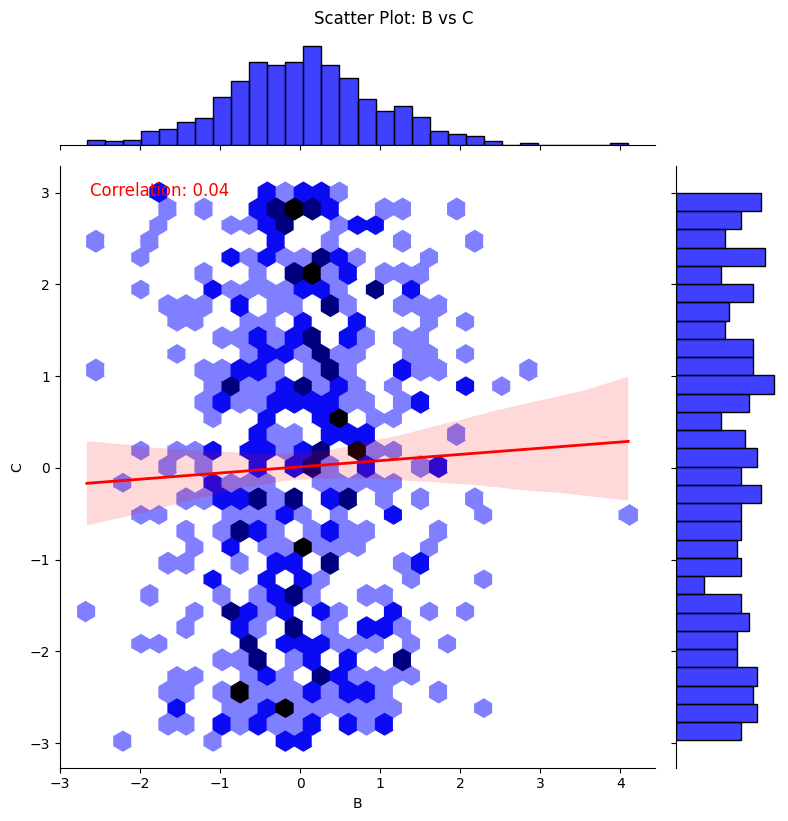

In [15]:
# Plot density plots for each pair of numerical columns with density and regression line
for col1, col2 in column_pairs:
    # Create the heatmap-style (hex) jointplot
    g = sns.jointplot(
        data=df, x=col1, y=col2, kind="hex", height=8,
        color="blue", gridsize=30, marginal_kws=dict(bins=30, fill=True)
    )

    # Calculate the correlation for the current pair
    correlation_value = numerical_cols[col1].corr(numerical_cols[col2])

    # Display the correlation value on the plot
    g.ax_joint.text(
        0.05, 0.95, f"Correlation: {correlation_value:.2f}",
        transform=g.ax_joint.transAxes, fontsize=12, color="red"
    )

    # Add a regression line with 95% confidence interval
    sns.regplot(
        data=df, x=col1, y=col2, scatter=False, ax=g.ax_joint,
        line_kws={"color": "red", "lw": 2}, ci=95
    )

    # Set the title for the plot
    g.fig.suptitle(f"Scatter Plot: {col1} vs {col2}", y=1.02)

    # Display the plot
    plt.show()

# Analysis of text columns

D
Category 2    127
Category 1    122
Category 3    116
Name: count, dtype: int64


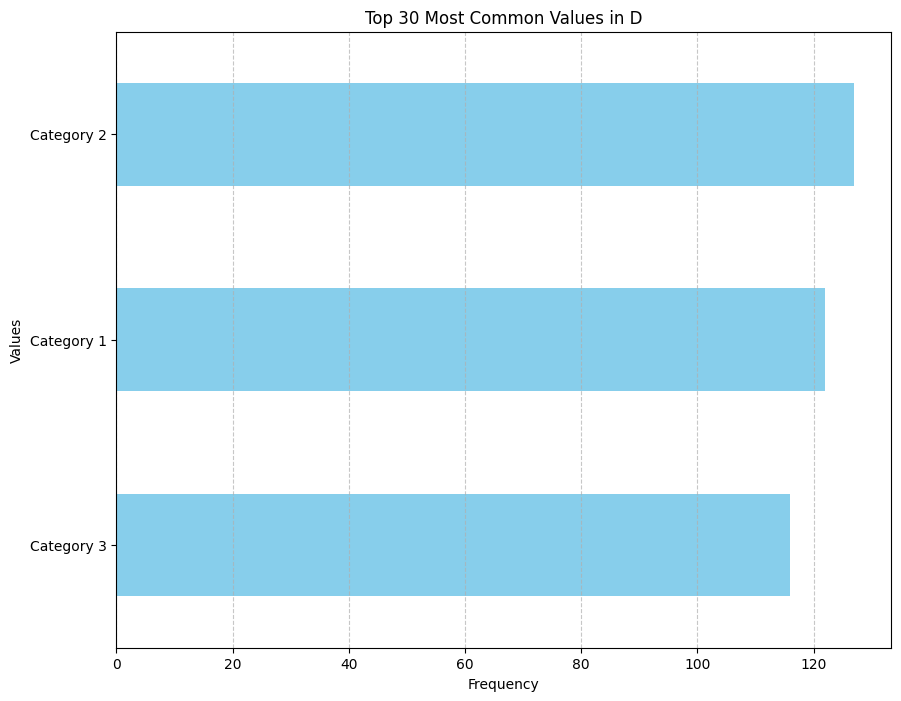

E
          139
Text A    121
Text C    121
Text B    119
Name: count, dtype: int64


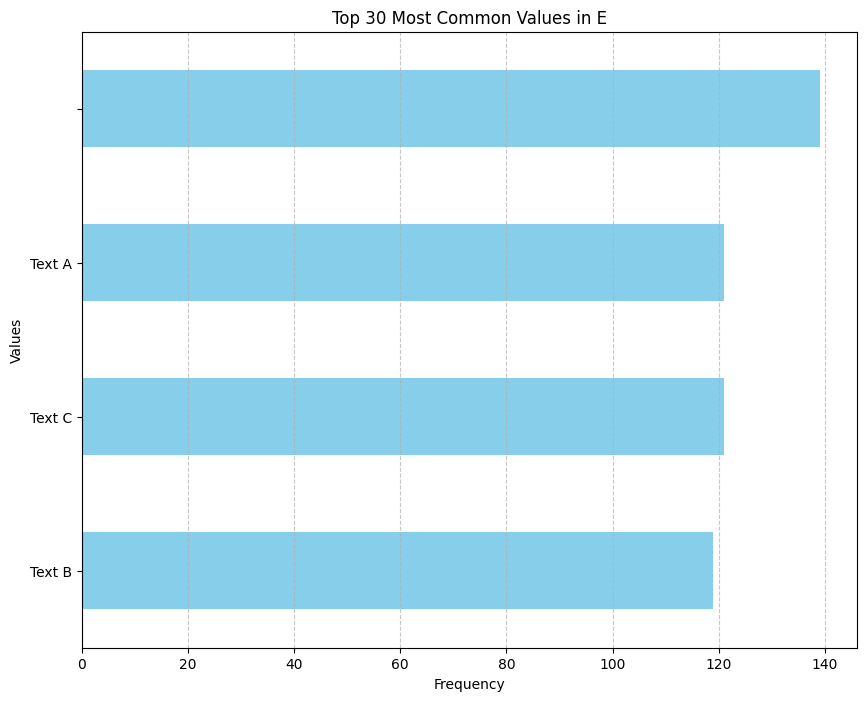

F
          139
Text A    121
Text C    121
Text B    119
Name: count, dtype: int64


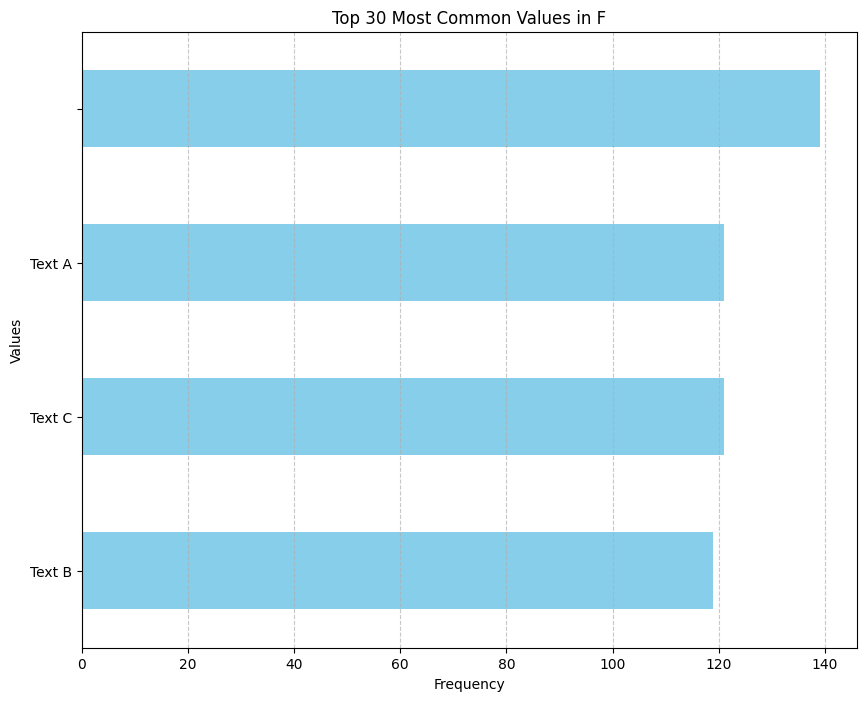

G
          139
Text A    121
Text C    121
Text B    119
Name: count, dtype: int64


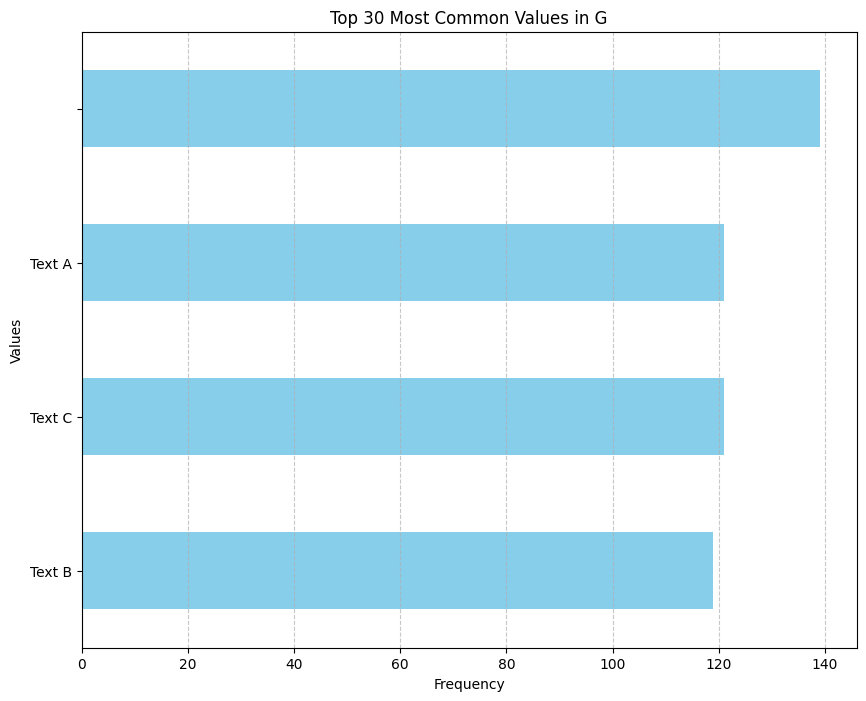

H
Category 2    127
Category 1    122
Category 3    116
Name: count, dtype: int64


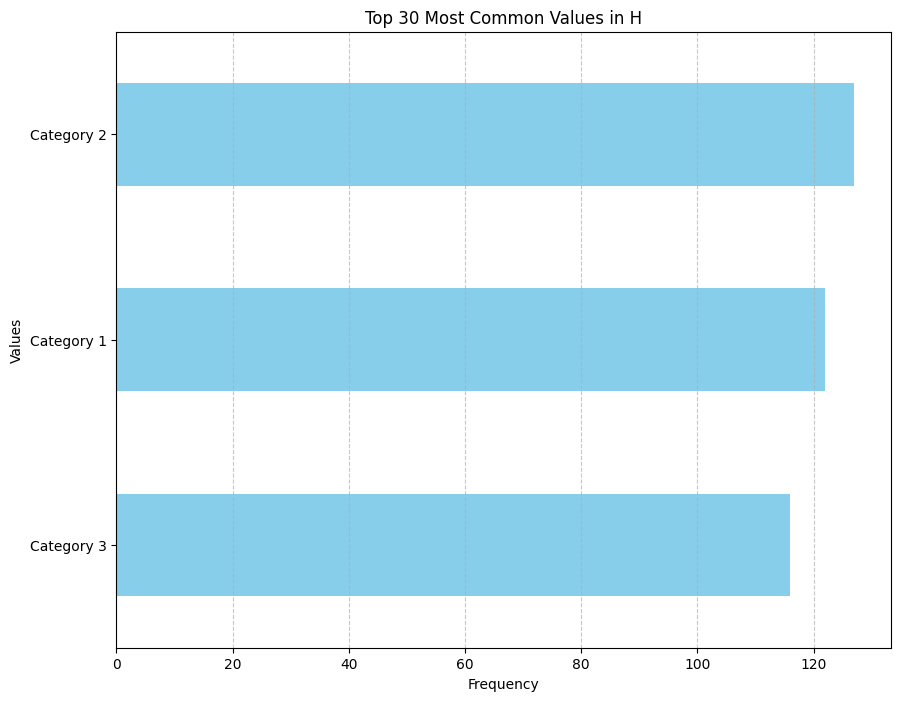

In [16]:
# Analyse frequency of values in text columns
text_cols = df.select_dtypes(include=['object', 'category'])
for column in text_cols.columns:
    value_counts = text_cols[column].value_counts().head(30)
    print(value_counts)
    plt.figure(figsize=(10, 8))
    value_counts.plot(kind='barh', color='skyblue')
    plt.title(f"Top 30 Most Common Values in {column}")
    plt.xlabel("Frequency")
    plt.ylabel("Values")
    plt.gca().invert_yaxis()  # To display the highest frequency at the top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()